# Практика 1

# Задача 1

Приведите пример дискретного вероятностного пространства с конечным (отдельно) и счетным (отдельно) множеством элементарных исходов. Докажите, что приведенный пример -- вероятностное пространство. Вычислите вероятность какого-нибудь события.

### Решение

<b>Конечное число исходов:</b> монетка, кубик, что-нибудь кастомное типа испытания по схеме Бернулли (например, серия из 5 пенальти с вероятностью $\mathsf{p}$ забить гол  в каждом испытании). Условие нормировки типа $\sum p_i = 1$.

<b>Счетное число исходов:</b> Монета подбрасывается до тех пор, пока не выпадет вверх орлом:
$$
\{о,ро,рро,ррро,...\}.
$$

Условие нормировки:
$$
\frac{1}{2} + \frac{1}{4} + \frac{1}{8} + \frac{1}{16} + \dots = \sum_{i=1}^{\infty} \frac{1}{2^i} = 1.
$$

Аналогично для другой ситуации до первого успеха, где $\mathsf{p}$ — вероятность успеха, $1-\mathsf{p}$ — вероятность неуспеха:
$$
\sum_{i=1}^{\infty} \mathsf{p}(1-\mathsf{p})^{i-1} = 1.
$$

[Вынести p, далее как сумма геометрической прогрессии]: #

Еще вариант — распределение Пуассона (например, число звонков в колл центр за один день: $\{0,1,2,...\}$). Вероятность для $k$-го звонка

$$
\mathsf{p}(k) = \frac{\lambda^k}{k!}e^{-\lambda},
$$

где $\lambda$ — параметр (математическое ожидание). Тогда
$$
\sum_{k=1}^{\infty} \frac{\lambda^k}{k!}e^{-\lambda} = 1
$$

[Дробь -- это разложение в ряд экспоненты]: #


# Задача 2

В урне $m$ черных и $n$ белых шаров (в достаточном количестве).

*    Наугад вытаскивают два шара. Какова вероятность, что оба вытащенных шара -- белые?
*    Наугад вытаскивают два шара. Какова вероятность, что шары разного цвета?
*    Наугад вытаскивают пять шаров. Какова вероятность, что вытащили два черных и три белых шара?
*    Первым вытащен белый шар. Какова вероятность, что вторым будет вытащен черный?
*    Какова вероятность, что последним будет вытащен белый шар?




### Решение

Наугад вытаскивают два шара. Какова вероятность, что оба вытащенных шара -- белые?

$$
\mathsf{P}(A) = \frac{C_n^2}{C_{m+n}^2}
$$

Наугад вытаскивают два шара. Какова вероятность, что шары разного цвета?

$$
\mathsf{P}(A) = \frac{C_m^1C_n^1}{C_{m+n}^2}
$$

Наугад вытаскивают пять шаров. Какова вероятность, что вытащили два черных и три белых шара?

$$
\mathsf{P}(A) = \frac{C_m^2C_n^3}{C_{m+n}^5}
$$

Первым вытащен белый шар. Какова вероятность, что вторым будет вытащен черный?

$$
\mathsf{P}(A) = \frac{C_m^1}{C_{m+n-1}^1}
$$

Какова вероятность, что последним будет вытащен белый шар?

Не учитываем, в каком порядке вытаскиваются шары. В конечном итоге, когда остается только один шар, вероятность того, что этот шар будет белым, зависит от того, сколько белых шаров было в начале. Значит

$$
\mathsf{P}(A) = \frac{n}{m+n}
$$

### Кодинг

In [5]:
from tqdm.notebook import tqdm
import random
from math import comb

m = 10 # Черные
n = 8 # Белые
n_experiments = 1_000_000

# Function to pick n balls from the urn
def pick_balls(k):
  picked = []
  urn = [0]*m + [1]*n
  for i in range(k):
    idx = random.randint(0,len(urn)-1)
    picked.append(urn.pop(idx))
  return picked

success = 0
for i in tqdm(range(n_experiments)):
  if sum(pick_balls(2)) == 2:
    success += 1

print('----------------------------------------------')
print('Вероятность, что оба вытащенных шара -- белые')
print('Теоретическое значение', comb(n,2)/comb(m+n,2))
print('Практическое значение', success/n_experiments)


  0%|          | 0/1000000 [00:00<?, ?it/s]

----------------------------------------------
Вероятность, что оба вытащенных шара -- белые
Теоретическое значение 0.1830065359477124
Практическое значение 0.183227


In [6]:
success = 0
for i in tqdm(range(n_experiments)):
  if sum(pick_balls(2)) == 1:
    success += 1
print('----------------------------------------------')
print('Вероятность, что шары разного цвета')
print('Теоретическое значение', comb(m,1)*comb(n,1)/comb(m+n,2))
print('Практическое значение', success/n_experiments)

  0%|          | 0/1000000 [00:00<?, ?it/s]

----------------------------------------------
Вероятность, что шары разного цвета
Теоретическое значение 0.5228758169934641
Практическое значение 0.52274


In [7]:
success = 0
for i in tqdm(range(n_experiments)):
  if sum(pick_balls(5)) == 3:
    success += 1
print('----------------------------------------------')
print('Вероятность, что вытащили два черных и три белых шара')
print('Теоретическое значение', comb(n,3)*comb(m,2)/comb(m+n,5))
print('Практическое значение', success/n_experiments)

  0%|          | 0/1000000 [00:00<?, ?it/s]

----------------------------------------------
Вероятность, что вытащили два черных и три белых шара
Теоретическое значение 0.29411764705882354
Практическое значение 0.293873


In [8]:
# Здесь нужно модифицировать функцию
def pick_black_ball(k):
  picked = []
  urn = [0]*m + [1]*(n-1)
  for i in range(k):
    idx = random.randint(0,len(urn)-1)
    picked.append(urn.pop(idx))
  return picked

success = 0
for i in tqdm(range(n_experiments)):
  if pick_black_ball(1)[0] == 0:
    success += 1
print('----------------------------------------------')
print('Первым вытащен белый шар. Какова вероятность, что вторым будет вытащен черный')
print('Теоретическое значение', comb(m,1)/comb(m+n-1,1))
print('Практическое значение', success/n_experiments)

  0%|          | 0/1000000 [00:00<?, ?it/s]

----------------------------------------------
Первым вытащен белый шар. Какова вероятность, что вторым будет вытащен черный
Теоретическое значение 0.5882352941176471
Практическое значение 0.588811


In [9]:
# Здесь нужно модифицировать функцию
def pick_white_last(k):
  picked = []
  urn = [0]*m + [1]*n
  for i in range(k):
    idx = random.randint(0,len(urn)-1)
    picked.append(urn.pop(idx))
  return picked

success = 0
for i in tqdm(range(n_experiments)):
  if pick_white_last(m+n)[-1] == 1:
    success += 1
print('----------------------------------------------')
print('Какова вероятность, что последним будет вытащен белый шар')
print('Теоретическое значение', n / (m+n))
print('Практическое значение', success/n_experiments)

  0%|          | 0/1000000 [00:00<?, ?it/s]

----------------------------------------------
Какова вероятность, что последним будет вытащен белый шар
Теоретическое значение 0.4444444444444444
Практическое значение 0.444018


# Задача 3

В лифт семиэтажного дома на первом этаже вошли три человека. Каждый из них с одинаковой вероятностью выходит на любом из этажей, начиная со второго.

*     Какова вероятность, что все пассажиры выйдут на четвертом этаже?
*     Какова вероятность, что все пассажиры выйдут на одном этаже?
*     Какова вероятность, что все пассажиры выйдут на разных этажах?

### Решение

Выбор этажа — равновероятное событие для каждого пассажира (вероятность $1/6$)

*     Какова вероятность, что все пассажиры выйдут на четвертом этаже?

Все выбрали этаж номер $4$ с вероятностью $1/6$

$$
\mathsf{P}(A) = \left(\frac{1}{6}\right)^3
$$

*     Какова вероятность, что все пассажиры выйдут на одном этаже?

как в предыдущем случае, только добавляем остальные этажи через "или":
$$
\mathsf{P}(A) = 6\left(\frac{1}{6}\right)^3 = \left(\frac{1}{6}\right)^2
$$

*     Какова вероятность, что все пассажиры выйдут на разных этажах?

Первый выбирает один этаж из $6$, второй — один из $5$, третий — один из $4$. Общее число исходов — этажи могут повторяться.

$$
\mathsf{P}(A) = \frac{C_6^1C_5^1C_4^1}{6^3}
$$

### Кодинг

In [10]:
import random
from tqdm.notebook import tqdm

building = list(range(2,8))

n_experiments = 1000000

# Function to floor
def pick_floor(k):
  picked = []
  for i in range(k):
    idx = random.randint(0,len(building)-1)
    picked.append(building[idx])
  return picked

success = 0
for i in tqdm(range(n_experiments)):
  floors = pick_floor(3)
  if len(set(floors)) == 1 and floors[0]==4:
    success += 1

print('----------------------------------------------')
print('Какова вероятность, что все пассажиры выйдут на четвертом этаже?')
print('Теоретическое значение', (1/6)**3)
print('Практическое значение', success/n_experiments)

  0%|          | 0/1000000 [00:00<?, ?it/s]

----------------------------------------------
Какова вероятность, что все пассажиры выйдут на четвертом этаже?
Теоретическое значение 0.0046296296296296285
Практическое значение 0.004635


In [11]:
success = 0
for i in tqdm(range(n_experiments)):
  floors = pick_floor(3)
  if len(set(floors)) == 1:
    success += 1

print('----------------------------------------------')
print('Какова вероятность, что все пассажиры выйдут на одном этаже?')
print('Теоретическое значение', (1/6)**2)
print('Практическое значение', success/n_experiments)

  0%|          | 0/1000000 [00:00<?, ?it/s]

----------------------------------------------
Какова вероятность, что все пассажиры выйдут на одном этаже?
Теоретическое значение 0.027777777777777776
Практическое значение 0.027746


In [12]:
success = 0
for i in tqdm(range(n_experiments)):
  floors = pick_floor(3)
  if len(set(floors)) == 3:
    success += 1

print('----------------------------------------------')
print('Какова вероятность, что все пассажиры выйдут на разных этажах?')
print('Теоретическое значение', 6*5*4/6**3)
print('Практическое значение', success/n_experiments)

  0%|          | 0/1000000 [00:00<?, ?it/s]

----------------------------------------------
Какова вероятность, что все пассажиры выйдут на разных этажах?
Теоретическое значение 0.5555555555555556
Практическое значение 0.55549


# Задача 4

Подбрасывается стандартный игральный кубик. Какова вероятность, что после $n$ бросаний выпадет хотя бы одно число $6$?

### Решение

Пусть событие $A$ — после $n$ бросаний выпало хотя бы одно число $6$. Пусть событие $B$ — число $6$ не выпало ни разу. Тогда
$$
\mathsf{P}(A) = 1-\mathsf{P}(B).
$$
Понятно, что  
$$
\mathsf{P}(B) = \left(\frac{5}{6}\right)^n,
$$
тогда
$$
\mathsf{P}(A) = 1 - \left(\frac{5}{6}\right)^n.
$$

### Кодинг

In [13]:
import random
from tqdm.notebook import tqdm

n = 10
n_experiments = 1000000

dice = list(range(1,7))

# Function to roll the dice
def roll_dice(n):
  picked = []
  for i in range(n):
    idx = random.randint(0,len(dice)-1)
    picked.append(dice[idx])
  return picked


success = 0
for i in tqdm(range(n_experiments)):
  if 6 in roll_dice(n):
    success += 1

print('----------------------------------------------')
print('Какова вероятность, что после 𝑛 бросаний выпадет хотя бы одно число 6')
print('Теоретическое значение', 1-(5/6)**n)
print('Практическое значение', success/n_experiments)

  0%|          | 0/1000000 [00:00<?, ?it/s]

----------------------------------------------
Какова вероятность, что после 𝑛 бросаний выпадет хотя бы одно число 6
Теоретическое значение 0.8384944171101543
Практическое значение 0.838234


# Задача 5

Из полной колоды карт (52 листа) вынимается одна карта. Рассматриваются события: А - появление туза, В - появление карты красной масти, С - появление бубнового туза, D - появление десятки. Зависимы или нет следующие пары событий: A и В, А и С, В и С, В и D, С и D? Почему?

### Решение

$$
\mathsf{P}(A) = \frac{4}{52} = \frac{1}{13},
$$
$$
\mathsf{P}(B) = \frac{1}{2},
$$
$$
\mathsf{P}(C) = \frac{1}{52},
$$
$$
\mathsf{P}(C) = \frac{4}{52} = \frac{1}{13}.
$$

Рассмотрим по очереди:


1.   A и B
$$
\mathsf{P}(A|B) = \frac{\mathsf{P}(A\cap B)}{\mathsf{P}(B)} = \frac{\frac{2}{52}}{\frac{1}{2}} = \frac{1}{13}.
$$
$$
\mathsf{P}(A|B) = \mathsf{P}(A),
$$
значит A и B независимы.
2.   A и С
$$
\mathsf{P}(A|C) = \frac{\mathsf{P}(A\cap C)}{\mathsf{P}(C)} = \frac{\frac{1}{52}}{\frac{1}{52}} = 1.
$$
$$
\mathsf{P}(A|C) \neq \mathsf{P}(A),
$$
значит A и C зависимы.
3.   B и С
$$
\mathsf{P}(B|C) = \frac{\mathsf{P}(B\cap C)}{\mathsf{P}(C)} = \frac{\frac{1}{52}}{\frac{1}{52}} = 1.
$$
$$
\mathsf{P}(B|C) \neq \mathsf{P}(B),
$$
значит B и C зависимы.
4.   B и D
$$
\mathsf{P}(B|D) = \frac{\mathsf{P}(B\cap D)}{\mathsf{P}(D)} = \frac{\frac{2}{52}}{\frac{1}{13}} = \frac{1}{2}.
$$
$$
\mathsf{P}(B|D) = \mathsf{P}(B),
$$
значит B и D независимы.
5.   C и D
$$
\mathsf{P}(C|D) = \frac{\mathsf{P}(C\cap D)}{\mathsf{P}(D)} = 0.
$$
$$
\mathsf{P}(C|D) \neq \mathsf{P}(C),
$$
значит C и D зависимы.

# Задача 6

Предположим, что в семье двое детей разного возраста. Какова вероятность, что они оба мальчики, если

*   Старший ребенок -- мальчик.
*   По крайней мере один из детей -- мальчик.

### Решение

Все возможные ситуации:
$$
\{М,М\},\{М,Д\}, \{Д,М\}, \{Д,Д\}
$$

1.    Событие A — оба ребенка мальчики, событие B — старший ребенок мальчик.
$$
\mathsf{P}(A|B) = \frac{\mathsf{P}(A\cap B)}{\mathsf{P}(B)} = \frac{\frac{1}{4}}{\frac{1}{2}} = \frac{1}{2}.
$$

2.    Событие A — оба ребенка мальчики, событие B — по крайней мере один из детей — мальчик.
$$
\mathsf{P}(A|B) = \frac{\mathsf{P}(A\cap B)}{\mathsf{P}(B)} = \frac{\frac{1}{4}}{\frac{3}{4}} = \frac{1}{3}.
$$


### Кодинг

In [15]:
from tqdm.notebook import tqdm
import random

n_experiments = 1000000

# Let's define 1 - Male, 0 - Female
def make_children(n):
  children = []
  for i in range(n):
    children.append(random.randint(0,1))
  return children

make_children(2)

success = 0
for i in tqdm(range(n_experiments)):
  children = make_children(2)
  children[0] = 1
  if sum(children) == 2:
    success += 1

print('----------------------------------------------')
print('Вероятность, что оба мальчики, если старший ребенок -- мальчик')
print('Теоретическое значение', 0.5)
print('Практическое значение', success/n_experiments)


  0%|          | 0/1000000 [00:00<?, ?it/s]

----------------------------------------------
Вероятность, что оба мальчики, если старший ребенок -- мальчик
Теоретическое значение 0.5
Практическое значение 0.499814


In [16]:
success = 0
n_conditions = 0
for i in tqdm(range(n_experiments)):
  children = make_children(2)
  if 1 in children:
    n_conditions += 1
    if sum(children) == 2:
      success += 1

print('----------------------------------------------')
print('Вероятность, что оба мальчики, если по крайней мере один из детей -- мальчик.')
print('Теоретическое значение', 1/3)
print('Практическое значение', success/n_conditions)

  0%|          | 0/1000000 [00:00<?, ?it/s]

----------------------------------------------
Вероятность, что оба мальчики, если по крайней мере один из детей -- мальчик.
Теоретическое значение 0.3333333333333333
Практическое значение 0.33255790067614704


# Задача 7

Пусть имеется две монеты: одна симметричная (шансы выпадения герба и решки одинаковы), и одна несимметричная (шансы выпадения герба к решке относятся как $1$ к $2$). Случайным образом берется одна монета и подбрасывается. Какова вероятность того, что подбросили симметричную монету, если известно, что выпал герб?

### Решение

Пусть событие $H_1$ — выбрали симметричную монету, $H_2$ — выбрали несимметричную монету. Событие $A$ — выпал герб. Воспользуемся формулой Байеса
$$
\mathsf{P}(H_1|A) = \frac{\mathsf{P}(H_1)\mathsf{P}(A|H_1)}{\mathsf{P}(A)} = \frac{\mathsf{P}(H_1)\mathsf{P}(A|H_1)}{\mathsf{P}(H_1)\mathsf{P}(A|H_1)+\mathsf{P}(H_2)\mathsf{P}(A|H_2)},
$$
то есть
$$
\mathsf{P}(H_1|A) = \frac{\frac{1}{2}\cdot \frac{1}{2}}{\frac{1}{2}\cdot \frac{1}{2} + \frac{1}{2}\cdot \frac{1}{3}} = \frac{{\frac{1}{4}}}{\frac{5}{12}} = 0.6
$$

### Кодинг

In [19]:
from tqdm.notebook import tqdm
import random
import numpy as np

coins = [[1,0,0], [0,1]]

n_experiments = 1000000
coin_arr = []
result_arr = []

for _ in tqdm(range(n_experiments)):
  coin = random.randint(0,1)
  result = random.choice(coins[coin])
  coin_arr.append(coin)
  result_arr.append(result)
print('----------------------------------------------')
print('Какова вероятность того, что подбросили симметричную монету, если известно, что выпал герб')
print('Теоретическое значение', 0.6)
print('Практическое значение', np.dot(np.array(coin_arr), np.array(result_arr)) / sum(result_arr))


  0%|          | 0/1000000 [00:00<?, ?it/s]

----------------------------------------------
Какова вероятность того, что подбросили симметричную монету, если известно, что выпал герб
Теоретическое значение 0.6
Практическое значение 0.5984395156156539


# Задача 8

Почему приведенная в самом начале дискретная схема напрямую не переносится на случай, когда пространство элементарных исходов, скажем, несчетно?

# Задача 9

В мишень стреляют пейнтбольным пистолетом. Мишень круглая и имеет радиус $a$. При попадании по мишени шарик с краской взрывается и закрашивает на мишени круг радиусом $b$ с центром в точке попадания. Какова вероятность того, что взорвавшийся шарик охватит краской центр мишени, если попадание в любую точку мишени равновозможно, а стрелок мимо мишени не промахивается?

### Решение

Для того, чтобы центр мишени был закрашен в результате выстрела, необходимо, чтобы центр шарика находился не далее, чем на расстоянии $b$ от центра мишени. Это будет происходить, если шарик будет попдать в круг радиуса $b$ с центром в центра мишени. Тогда если событие $A$ — взорвавшийся шарик охватил краской центр мишени, то
$$
\mathsf{P}(A) = \frac{\pi b^2}{\pi a^2} = \frac{b^2}{a^2}.
$$

### Кодинг

In [20]:
import numpy as np
from tqdm.notebook import tqdm

a = 9
b = 3
success = 0
sample_size = 10000000

x = np.random.uniform(-a,a, sample_size)
y = np.random.uniform(-a,a, sample_size)
dists = (x**2 + y**2)**0.5
# Отбираем только те, что в круге радиуса a
dists = dists[dists <= a]

for item in tqdm(dists):
  if item < b:
    success +=1

print('Теоретическое значение: ', (b**2)/(a**2))
print('Практическое значение: ', success/len(dists))

  0%|          | 0/7852975 [00:00<?, ?it/s]

Теоретическое значение:  0.1111111111111111
Практическое значение:  0.11120651727530012


# Задача 10

### Мультиномиальное (полиномиальное) распределение

Пусть при каждом испытании вероятности событий $A_1, A_2, \dots, A_m$ равны соответственно $\mathsf{p}_1, \mathsf{p}_2, \dots, \mathsf{p}_m$, причем
$$\sum_{i=1}^{k}\mathsf{p}_i = 1.$$

Тогда совместное распределение величин $X_1, X_2, \dots, X_m$, где $X_k$ — число наступлений события $A_k$ в серии из $n$ испытаний, задается вероятностями

$$
\mathsf{P}\left(X_1 = n_1, \dots, X_m = n_m, \right) = \frac{n!}{n_1!\dots n_m!}\mathsf{p}_1^{n_1}\dots \mathsf{p}_m^{n_m},
$$

где $n_1, n_2, \dots, n_m$ — произвольный набор целых неотрицательных чисел, таких что

$$\sum_{i=1}^m n_i = n.$$



**Пример:** подбрасываение шестигранного кубика $n$ раз. В этом случае событие $A_i$ — выпадение числа $i$, все вероятности $\mathsf{p}_i = \frac{1}{6}$, $X_i$ — число выпадений грани $i$ в результате $n$ экспериментов.

### Пример

В урне находится 5 красных шаров, 3 зеленых и 2 синих. Из урны вынимают наугад 5 шаров, каждый раз возвращая шар обратно. Найти вероятность получить ровно 2 красных, 2 зеленых и 1 синий шарик?

#### Решение

Пусть

*   $R$ — вытащен красный шар, $\mathsf{p}(R) = 0.5$
*   $G$ — вытащен зеленый шар, $\mathsf{p}(G) = 0.3$
*   $B$ — вытащен синий шар, $\mathsf{p}(B) = 0.2$

$X_i$, $i \in \{R,G,B\}$ — количество раз, когда вытащили шар $i$. Тогда
$$
\mathsf{P}(X_R=2, X_G=2, X_B = 1) = \frac{5!}{2!2!1!}0.5^2\cdot0.3^2\cdot 0.2 = 0.135
$$

### Кодинг

In [21]:
import numpy as np
from tqdm.notebook import tqdm
import random
from math import factorial as fct

success = 0
n_experiments = 1000000
R = 5 # 0
G = 3 # 1
B = 2 # 2



# Function to pick n balls from the urn
def pick_balls(k):
  picked = []
  urn = [0]*R + [1]*G + [2]*B
  for i in range(k):
    idx = random.randint(0,len(urn)-1)
    picked.append(urn[idx])
  return picked

for _ in tqdm(range(n_experiments)):
  result = np.array(pick_balls(5))
  if len(result[result == 0]) == 2 and len(result[result == 1]) == 2 and len(result[result == 2]) == 1:
    success += 1

print('----------------------------------------------')
print('Найти вероятность получить ровно 2 красных, 2 зеленых и 1 синий шарик?')
print('Теоретическое значение', fct(5)/fct(2)/fct(2)/fct(1)*0.5**2*0.3**2*0.2)
print('Практическое значение', success / n_experiments)

  0%|          | 0/1000000 [00:00<?, ?it/s]

----------------------------------------------
Найти вероятность получить ровно 2 красных, 2 зеленых и 1 синий шарик?
Теоретическое значение 0.13499999999999998
Практическое значение 0.134851


# Задача 11 (Еще немного абсолютно-непрерывных распределений)

Как вообще задавать случайные величины с абсолютно непрерывным распределением? В целом, с любой неотрицательной со сходящимся интегралом функцией можно состряпать распределение.

Если
$$
f_{\xi}(x) = \frac{x^{n-1}}{\Gamma(n)}e^{-x}, \quad x \geq 0,
$$
то перед нами **гамма-распределение**. Обобщают это распределение еще и так ($\Gamma(n, \theta)$)
$$
f_{\xi}(x) = \frac{x^{n-1}}{\theta^n\Gamma(n)}e^{-x/\theta}, \quad x \geq 0.
$$

Еще один важный тип — **бета-распределение**
$$
f_\xi(x) = \frac{x^{\alpha - 1}(1-x)^{\beta-1}}{B(\alpha, \beta)}, \quad x \in [0,1].
$$
Увидим, что оно является [сопряженным априорным распределением](https://ru.wikipedia.org/wiki/%D0%A1%D0%BE%D0%BF%D1%80%D1%8F%D0%B6%D1%91%D0%BD%D0%BD%D0%BE%D0%B5_%D0%B0%D0%BF%D1%80%D0%B8%D0%BE%D1%80%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5) для распределений Бернулли, геометричсекого и биномиального.

Если $\xi_1, \xi_2, \ldots, \xi_n \sim \mathsf N_{0, 1}$ и независимы в совокупности, то
$$
\xi_1^2 + \ldots +\xi_n^2 \sim \chi^2(n)
$$
— **распределение хи-квадрат** с $n$ степенями свободы. Плотность распределения может быть выписана явно:
$$
f_{\chi^2} = \frac{1}{2^{n/2}\Gamma(n/2)}x^{n/2-1}e^{-x/2}.
$$
Понятно, что распределение хи-квадрат -- это частный случай гамма-распределения. Действительно, это $\Gamma(n/2, 2)$.

t-распределение Стьюдента. Если $\xi_0, \xi_1, \xi_2, \ldots, \xi_n \sim \mathsf N_{0, 1}$ и независимы в совокупности, то
$$
\frac{\xi_0}{\sqrt{\frac{1}{n} \sum\limits_{i = 1}^n \xi_i^2}} \sim t(n)
$$
— распределение Стьюдента с $n$ степенями свободы. [Картинки](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%A1%D1%82%D1%8C%D1%8E%D0%B4%D0%B5%D0%BD%D1%82%D0%B0)

### Доп материал (независимость в совокупности)

**Определение:**

События $A_1, A_2, ..., A_n$ называются независимыми в совокупности, если для любого $1 \leq k \leq n$ и любых натуральных чисел $i_1, ..., i_k$ таких, что $1 \leq i_1 < i_2 < ... < i_k \leq n$ выполняется
$$
\mathsf P(A_{i_1} \cap A_{i_2} \cap ... \cap A_{i_k}) = \mathsf P(A_{i_1})\mathsf P(A_{i_2})\cdot ... \cdot \mathsf P(A_{i_k}).
$$


Иными словами, при независимости в совокупности событий независим любой поднабор этих событий.

Сравним введенное понятие с понятием попарной независимости. Конечно, попарная независимость (то есть независимость любых двух взятых событий) следует из независимости в совокупности, достаточно просто взять $k = 2$. Обратное, вообще говоря, неверно, что показывается следующий пример.


**Пример:**


Рассмотрим правильный тетраэдр, одна грань которого покрашена в красный цвет, другая -- в синий, а третья -- в зеленый. Четвертая же грань содержит все три цвета: красный, синий и зеленый. Тетраэдр случайным образом бросается на ровную поверхность. Событие <<выпал какой-то цвет>> означает, что тетраэдр лежит на стороне, которая содержит рассматриваемый цвет. Пусть событие $A$ заключается в том, что выпал красный цвет, событие $B$ -- выпал синий цвет, событие $C$ -- выпал зеленый цвет. Тогда $\mathsf P(A) = \mathsf P(B) = \mathsf P(C) = \frac{1}{2}$, так как каждый цвет присутствует на двух гранях из четырех. Кроме того, $\mathsf P(A \cap B) = \mathsf P(A \cap C) = \mathsf P (B \cap C) = \frac{1}{4}$, так как одновременно два цвета присутствуют только на одной грани, а значит
$$
\frac{1}{4} = \mathsf P(A \cap B) = \mathsf P(A)\mathsf P(B) = \frac{1}{2}\cdot \frac{1}{2},
$$
то есть события $A$ и $B$ независимы. Аналогично, события $B$ и $C$ и события $A$ и $C$ независимы, откуда следует, что события $A, B, C$ попарно независимы. Будут ли они независимы в совокупности? Так как $\mathsf P(A \cap B \cap C) = \frac{1}{4}$, ведь все цвета встречаются только на одной грани, то
$$
\frac{1}{4} = \mathsf P(A \cap B \cap C) \neq \frac{1}{2}\cdot \frac{1}{2}\cdot\frac{1}{2} = \mathsf P(A)\mathsf P(B) \mathsf P(C).
$$
Значит, события $A, B, C$, являясь попарно независимыми, независимыми в совокупности не являются.
\end{example}
Подумайте, а следует ли из того, что для набора событий $A_1, A_2, ..., A_n$ выполняется равенство
$$
\mathsf P(A_1 \cap A_2 \cap ... \cap A_n) =\mathsf P(A_1) \mathsf P(A_2)... \mathsf P(A_n)
$$
независимость в совокупности этих событий? На самом деле ответ нет, а значит требования в определении нельзя ослабить.

# Задача 12 (Пример сингулярного распределения)

### Множество Кантора и его свойства

Из отрезка $C_0 = \left[0,1\right]$ удаляется средняя часть, то есть интервал $\left(\frac{1}{3}, \frac{2}{3}\right)$. Оставшееся множество обозначается $C_1$, оно состоит из двух отрезков $\Delta_0 = \left[0, \frac{1}{3}\right]$ и $\Delta_1 = \left[\frac{2}{3},1\right]$. Из каждого отрезка снова удаляется средняя треть, оставшееся множество обозначается $C_2$, а его элементы $\Delta_{00}, \Delta_{01}, \Delta_{10}, \Delta_{11}$, и так далее.

В результате получается последовательность замкнутых множеств $C_0 \supset C_1 \supset C_2 \supset \dots$.

Множество
$$
C = ⋂\limits_{i=0}^{\infty}C_i
$$

называется канторовым множеством.

Во-первых, длина построенного множества ранва нулю. Действительно, на каждом этапе мы выкидываем множество длины
$$
\frac{2^{n-1}}{3^n},
$$
а значит суммарно мы выбрасываем
$$
\sum\limits_{n = 1}^\infty \frac{2^{n-1}}{3^n} = 1.
$$
В то же время, мощность построенного множества — континуум — система вложенных отрезков сходится к двоичной записи вещественного числа, и наоборот.

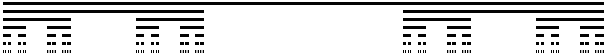

### Лестница Кантора

Канторова лестница — пример непрерывной монотонной функции $[0,1]\to[0,1]$, которая не является константой, но при этом имеет производную, равную нулю почти всюду на отрезке.

Она строится по индукции. В точках 0 и 1 функция принимает значения 0 и 1 соответственно. Далее интервал $(0,1)$ разбивается на равные части $\left(0,\dfrac 1 3\right),\left(\dfrac 13, \dfrac 23\right),\left(\dfrac 2 3, 1\right)$. На среднем сегменте полагаем $F(x)=\dfrac 12$. На оставшихся сегментах доопределяем функцию линейно. Далее, дробим $\left(0,\dfrac 1 3\right),\left(\dfrac 2 3, 1\right)$ на три части, на среднем сегменте кладем полусуммой, на оставшихся линейно, и так далее.

Получаем последовательность функций, причем
$$
|\varphi_n - \varphi_{n+k}| \leq 1/n.
$$
Это влечет равномерную сходимость, а значит сходимость к непрерывной функции.

Untitled.avif

# Задача 13

Случайная величина $\xi$ может принимать значения с ненулевой вероятностью только на отрезке $[0,\frac\pi4]$, при этом ее функция распределения на этом отрезке задается выражением $a\cdot \sin x$.

*   Найдите возможные значения $a$, напишите выражение для функции распределения. В полученном полуинтервале для $a$ выберете среднее значение параметра и найдите вероятность события $\xi=\frac\pi4$.
*   Выберите такое значение $a$, чтобы функция распределения была непрерывна. При этом значении $a$ вычислите вероятность события $\xi\in[0,\frac \pi 6]$.

### Решение



*    Так как функция распределения не убывает, то $a \geq 0$. Кроме того, $a \sin \frac{\pi}{4} \leq 1$, откуда $a \leq \sqrt{2}$. Итого, $a \in [0, \sqrt{2}]$.

Функция распределения при $a$ из указанного множества задается выражением
$$
F_\xi(x) = \begin{cases}
 0, & x \leq 0 \\
 a \cdot \sin x, & 0 < x \leq \frac{\pi}{4} \\
 1, & x > \frac{\pi}{4}
 \end{cases}.
$$

Среднее значение параметра $a$ равно $\frac{\sqrt{2}}{2}$, и тогда
$$
\mathsf P\left(\xi = \frac{\pi}{4}\right) = F_\xi\left(\frac{\pi}{4} + 0\right) - F_\xi\left(\frac{\pi}{4}\right) = 1 - \frac{\sqrt{2}}{2} \cdot \frac{\sqrt{2}}{2} = 0.5
$$

*   Функция распределения непрерывна при $a = \sqrt{2}$, при этом $a$
$$
\mathsf P\left(\xi \in \left[0, \frac{\pi}{6}\right]\right) = F_\xi\left(\frac{\pi}{6} \right) - F_\xi(0) = \sqrt{2}\left(\sin \frac{\pi}{6} - \sin 0\right) = \frac{\sqrt{2}}{2}.
$$